In [ ]:
def get_frequencias(dados):
    conjunto = set(dados) # Sem repetições
    frequencias = {} 
    for c in conjunto:
        frequencias[c] = len([x for x in dados if x == c]) # contagens
    frequencias = dict(sorted(frequencias.items())) # ordem alfabética
    return frequencias

In [9]:
get_frequencias(['Uva','Uva','Uva','Uva','Uva','Manga','Manga','Manga','Manga', 'Abacaxi'])

{'Abacaxi': 1, 'Manga': 4, 'Uva': 5}

$$
\sum_{i=1}^{k}f_i=n
$$

In [ ]:
l = [2,3,4,5, 1,2,3,4,4,4,5]
L = get_frequencias(l)
print(L)
print(len(l)==sum(L.values())) #o somatório das frequências está dando n ?

{1: 1, 2: 2, 3: 2, 4: 4, 5: 2}
True


In [19]:
def get_frequencias_relativas(dados):
    frequencias = {}
    n = len(dados)
    for k, v in get_frequencias(dados).items():
        frequencias[k] = v/n
    return frequencias

In [20]:
get_frequencias_relativas(['Uva','Uva','Uva','Uva','Uva','Manga','Manga','Manga','Manga', 'Abacaxi'])

{'Abacaxi': 0.1, 'Manga': 0.4, 'Uva': 0.5}

In [ ]:
l = [2,3,4,5,1,2,3,4,4,4,5]
L = get_frequencias_relativas(l)
print(L)
print(sum(L.values())==1) #o somatório das frequências está dando n ?

{1: 0.09090909090909091, 2: 0.18181818181818182, 3: 0.18181818181818182, 4: 0.36363636363636365, 5: 0.18181818181818182}
True


In [33]:
def barplot(L, title="",xlabel="", ylabel="" ):
    import matplotlib.pyplot as plt
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.bar(L.keys(), L.values())

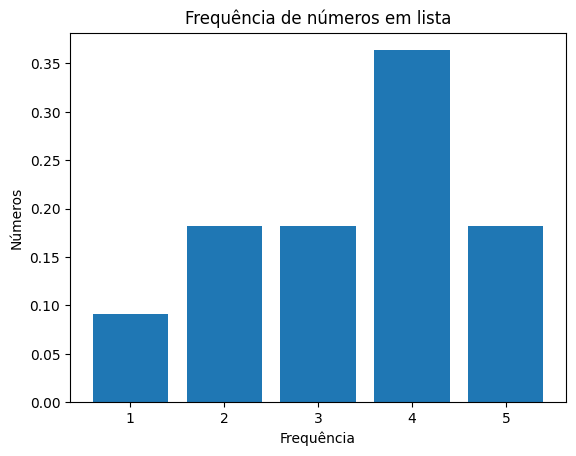

In [34]:
l = [2,3,4,5,1,2,3,4,4,4,5]
L = get_frequencias_relativas(l)

barplot(L, "Frequência de números em lista", "Frequência","Números" )


In [40]:
def get_frequencias_acumuladas(L):
    frequencias = {}
    for k,v in L.items():
        frequencias[k] = v #+ frequencias.values()[0]

In [41]:
get_frequencias_acumuladas(L)

In [ ]:
def circular_plot(L):
    import matplotlib.pyplot as plt
    import numpy as np
    angles = np.linspace(0, 2*np.pi, endpoint=False)
    